In [113]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# google told me to add this one too...?
import plotly.express as px

In [114]:
#Save path to the data set as a variable
insurance_data = Path("insurance.csv")

In [115]:
# Useed Pandas to read data form CSV
insurance_data_df = pd.read_csv(insurance_file)
insurance_data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
#statistical overview
#outliers?
insurance_data_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [117]:
# print column names
print(insurance_data_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [118]:
# data for men and woman
print(insurance_data_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [119]:
# Ladies data only
female_data = insurance_data_df[insurance_data_df["sex"] == "female"]
combined_data = pd.concat([insurance_data_df, female_data], ignore_index=True)
print(female_data)

      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[662 rows x 7 columns]


In [120]:
# describe female data
female_data.describe

<bound method NDFrame.describe of       age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[662 rows x 7 columns]>

In [155]:
# Now for the question... "In women, is there a relationship between BMI and children?
# prep data
female_data[["bmi", "children", "charges"]]

,bmi,children,charges
0,27.90,0,16884.92400
5,25.74,0,3756.62160
6,33.44,1,8240.58960
7,27.74,3,7281.50560
9,25.84,0,28923.13692
...,...,...,...
1332,44.70,3,11411.68500
1334,31.92,0,2205.98080
1335,36.85,0,1629.83350
1336,25.80,0,2007.94500


Text(0.5, 1.0, 'Relationship Between BMI and Number of Children (Women)')

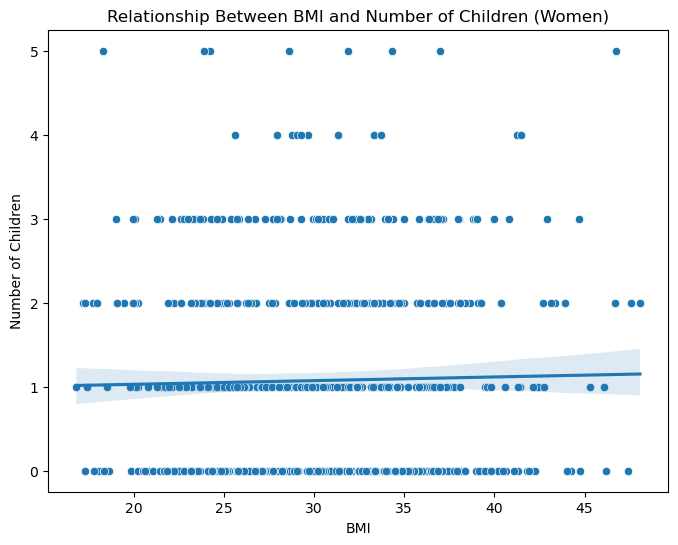

In [122]:
# visualization: Females only bmi and # of children
# scatter plt with a linear regression line
# looks flat...

plt.figure(figsize=(8, 6))
sns.scatterplot(x="bmi", y="children", data=female_data)

sns.regplot(x="bmi", y="children", data=female_data, scatter=False)

plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Relationship Between BMI and Number of Children (Women)")

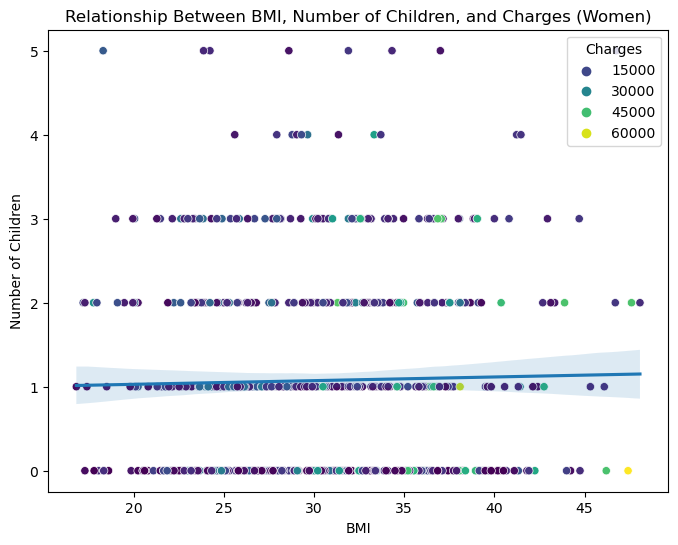

In [156]:
# visualization: Females only bmi and # of children
# scatter plt with a linear regression line
# I added charges
plt.figure(figsize=(8, 6))

sns.scatterplot(x="bmi", y="children", data=female_data, hue="charges", palette="viridis")

# Linear regression line
sns.regplot(x="bmi", y="children", data=female_data, scatter=False)

plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Relationship Between BMI, Number of Children, and Charges (Women)")

plt.legend(title="Charges")
plt.show()

In [127]:
x = female_data["bmi"]
y = female_data["children"]

slope = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
intercept = np.mean(y) - slope * np.mean(x)

residuals = y - (intercept + slope * x)

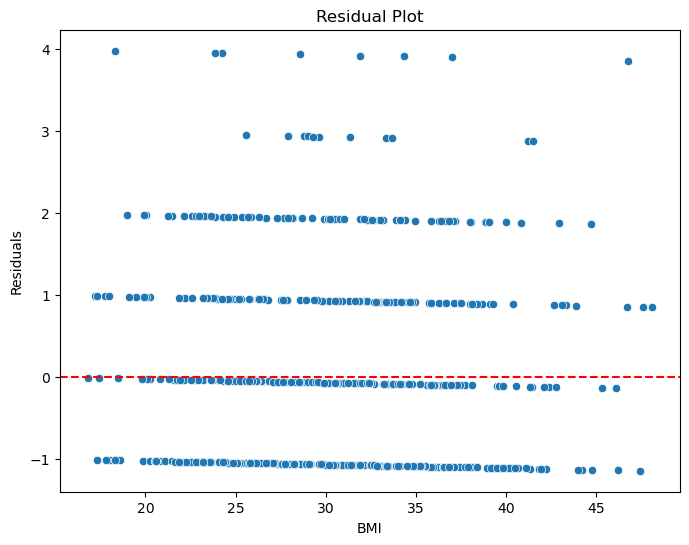

In [136]:
# residual plot
residuals = female_data["children"] - (intercept + slope * female_data["bmi"])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=female_data["bmi"], y=residuals)

plt.axhline(y=0, color='r', linestyle='--')

# labels
plt.xlabel("BMI")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()

Text(0.5, 1.0, 'Residual Plot')

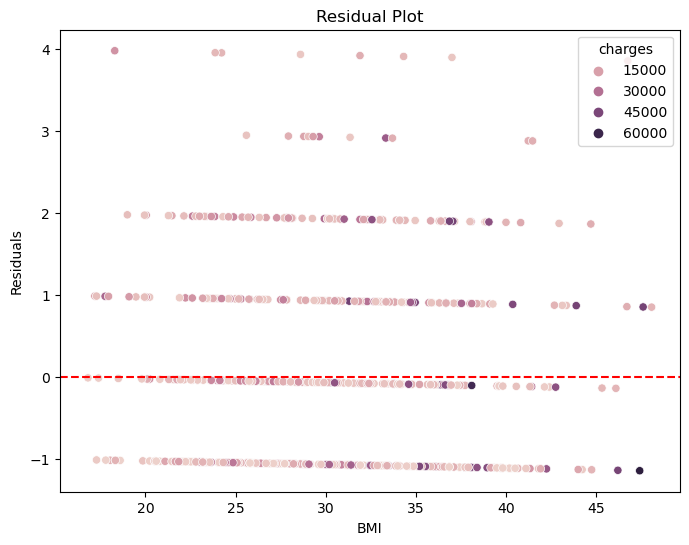

In [158]:
residuals = female_data["children"] - (intercept + slope * female_data["bmi"])

# residual plot plus charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=female_data["bmi"], y=residuals, hue=female_data["charges"])

# orizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# labels
plt.xlabel("BMI")
plt.ylabel("Residuals")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Box Plot of Number of Children vs. BMI (Women)')

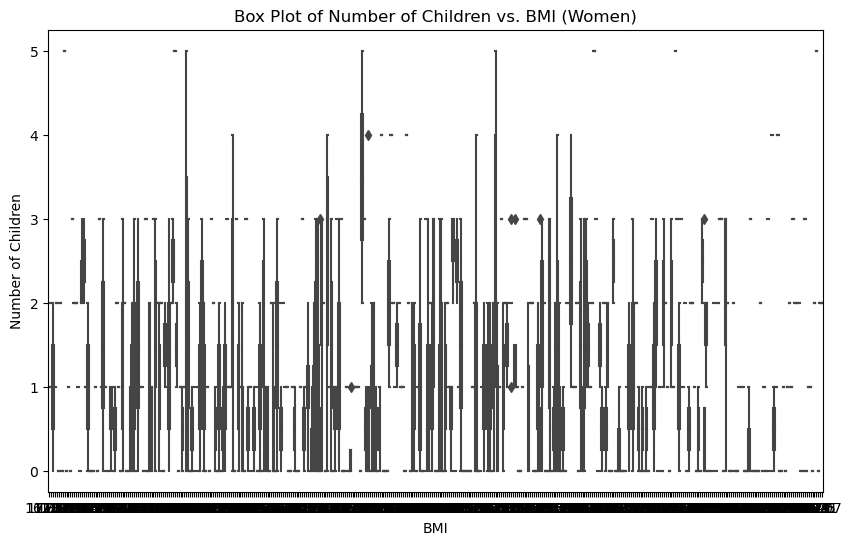

In [153]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="bmi", y="children", data=female_data)

#labels
plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Box Plot of Number of Children vs. BMI (Women)")

Text(0.5, 1.0, 'Violin Plot of Number of Children vs. BMI (Women)')

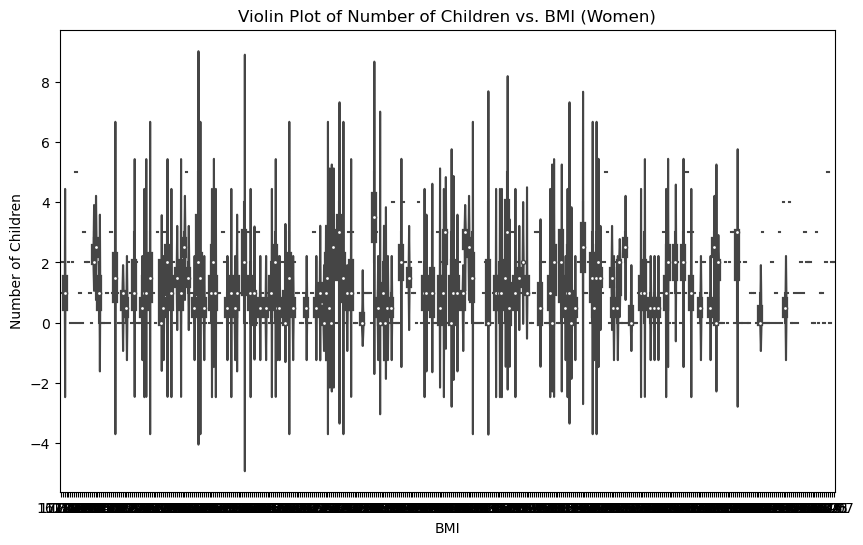

In [135]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="bmi", y="children", data=female_data)

# labels
plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Violin Plot of Number of Children vs. BMI (Women)")

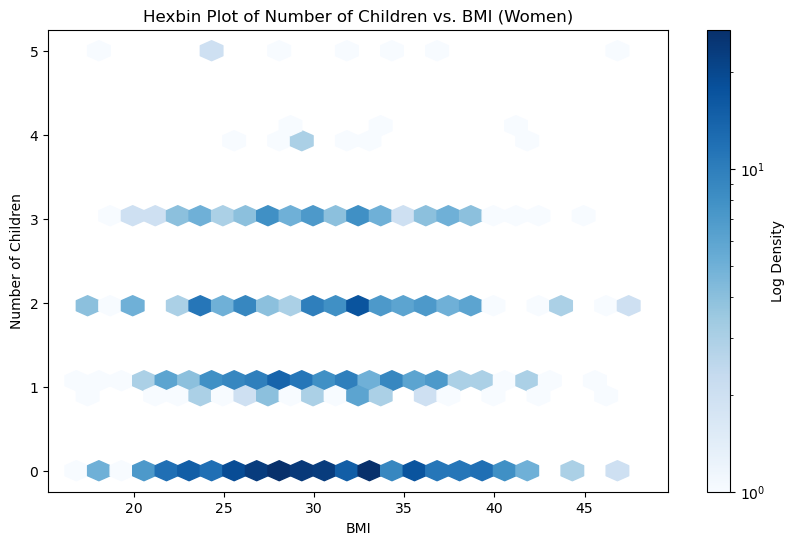

In [143]:
# 
bmi = female_data["bmi"]
children = female_data["children"]

# hexbin plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(bmi, children, gridsize=25, cmap='Blues', bins='log', mincnt=1)

# labels
plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Hexbin Plot of Number of Children vs. BMI (Women)")

# google had this..
cb = plt.colorbar(hb)
cb.set_label('Log Density')

<Figure size 1000x600 with 0 Axes>

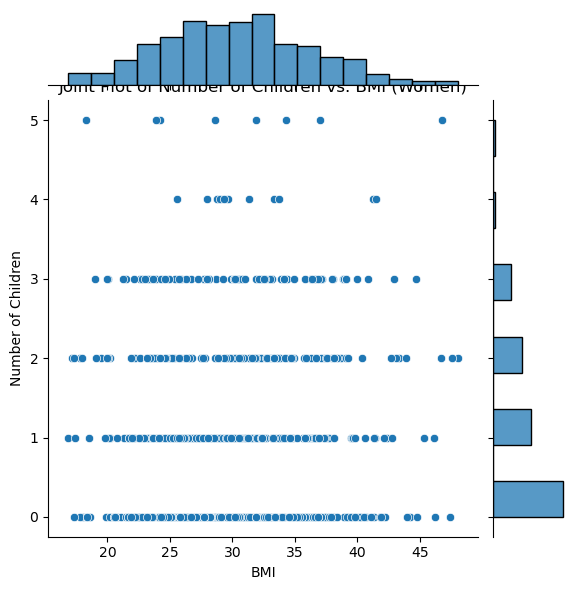

In [145]:
# Joint Plot
plt.figure(figsize=(10, 6))
sns.jointplot(x="bmi", y="children", data=female_data, kind="scatter")

# labels
plt.xlabel("BMI")
plt.ylabel("Number of Children")
plt.title("Joint Plot of Number of Children vs. BMI (Women)")

plt.show()

Text(0.5, 1.0, 'Swarm Plot of Number of Children vs. BMI (Women)')

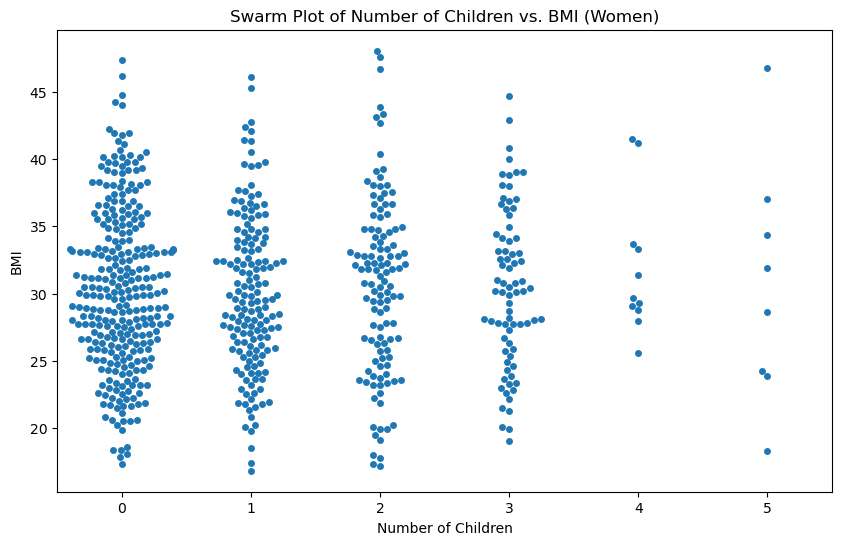

In [152]:
#Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x="children", y="bmi", data=female_data)

# labels
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.title("Swarm Plot of Number of Children vs. BMI (Women)")

SyntaxError: '(' was never closed (3296337713.py, line 1)